In [2]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.cm as cm
import seaborn as sns

md2.visualization.set_perturbation_color('gray')

[DEBUG] Using default logger (stdout, stderr).


In [3]:
# Define useful lookup variables
cols = ['#016bff',
        '#b91f1c',
        '#308937',
        '#ff8137',
        '#6f4fc7',
        '#d4b300',
        '#893a2b',
        '#ff6c79',
        '#16c4ff',
        '#766f41',
        '#00c800',
        '#af3261']

pretty_names_dir = {'B_caccae': '$B. caccae$',
                'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
                'B_ovatus': '$B. ovatus$',
                'B_thetaiotaomicron': '$B. thetaiotaomicron$',
                'B_uniformis': '$B. uniformis$',
                'B_vulgatus': '$B. vulgatus$',
                'C_aerofaciens': '$C. aerofaciens$',
                'C_scindens': '$C. scindens$',
                'C_spiroforme': '$C. spiroforme$',
                'D_longicatena': '$D. longicatena$',
                'P_distasonis': '$P. distasonis$',
                'R_obeum': '$R. obeum$'}

In [5]:
subj = np.load('mcnulty-results/forward-simulate/subj.npy')
subj.shape

(950, 12, 4002)

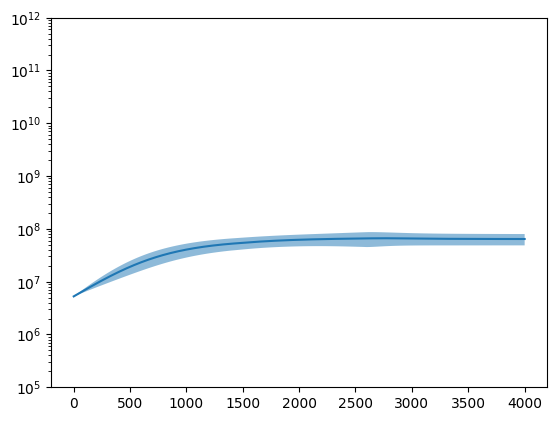

In [6]:
mean = np.mean(subj, axis=0)
std = np.std(subj, axis=0)
def get_95CI(x):
    return np.percentile(x, [2.5, 97.5], axis=0)
ci95 = get_95CI(subj)
plt.plot(mean[0,:])
plt.fill_between(np.arange(mean.shape[1]), mean[0,:]-std[0,:], mean[0,:]+std[0,:], alpha=0.5)
plt.ylim([1e5, 1e12])
plt.yscale('log')
plt.show()

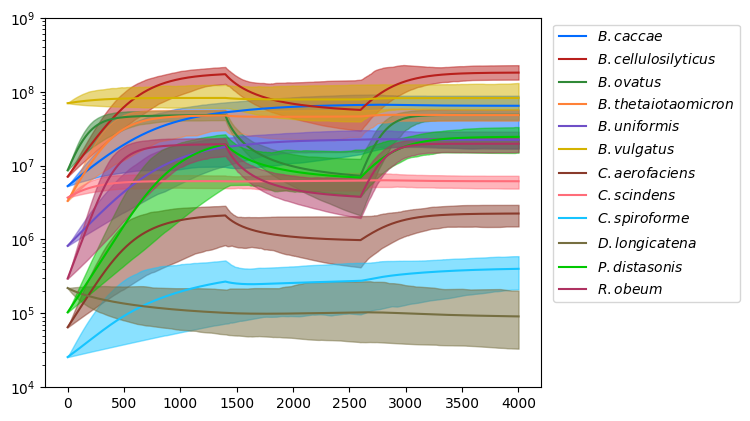

In [7]:
for i in range(mean.shape[0]):
    plt.plot(mean[i,:], color=cols[i], label=list(pretty_names_dir.values())[i])
    # plt.fill_between(np.arange(mean.shape[1]), mean[i,:]-std[i,:], mean[i,:]+std[i,:], color=cols[i], alpha=0.5)
    plt.fill_between(np.arange(mean.shape[1]), ci95[0,i,:], ci95[1,i,:], color=cols[i], alpha=0.5)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.ylim([1e4, 1e9])
plt.yscale('log')
plt.show()

In [8]:
yuca = pd.DataFrame(mean, columns=np.arange(mean.shape[1]), index=list(pretty_names_dir.values()))
yuca

,0,1,2,3,4,5,6,7,8,9,...,3992,3993,3994,3995,3996,3997,3998,3999,4000,4001
$B. caccae$,5.267665e+06,5.282736e+06,5.297849e+06,5.313003e+06,5.328200e+06,5.343439e+06,5.358720e+06,5.374043e+06,5.389409e+06,5.404817e+06,...,6.429898e+07,6.429871e+07,6.429844e+07,6.429818e+07,6.429791e+07,6.429764e+07,6.429738e+07,6.429712e+07,6.429685e+07,6.429659e+07
$B. cellulosilyticus$,7.062241e+06,7.097159e+06,7.132246e+06,7.167503e+06,7.202931e+06,7.238530e+06,7.274301e+06,7.310244e+06,7.346361e+06,7.382652e+06,...,1.806251e+08,1.806277e+08,1.806303e+08,1.806329e+08,1.806355e+08,1.806381e+08,1.806407e+08,1.806432e+08,1.806458e+08,1.806483e+08
$B. ovatus$,8.605480e+06,8.675706e+06,8.746391e+06,8.817537e+06,8.889144e+06,8.961212e+06,9.033743e+06,9.106738e+06,9.180195e+06,9.254117e+06,...,4.847093e+07,4.847088e+07,4.847083e+07,4.847078e+07,4.847073e+07,4.847068e+07,4.847063e+07,4.847059e+07,4.847054e+07,4.847049e+07
$B. thetaiotaomicron$,3.322607e+06,3.342734e+06,3.362979e+06,3.383342e+06,3.403824e+06,3.424424e+06,3.445145e+06,3.465986e+06,3.486948e+06,3.508032e+06,...,4.812071e+07,4.812072e+07,4.812073e+07,4.812074e+07,4.812075e+07,4.812076e+07,4.812077e+07,4.812078e+07,4.812079e+07,4.812080e+07
$B. uniformis$,8.188453e+05,8.217736e+05,8.247124e+05,8.276617e+05,8.306216e+05,8.335920e+05,8.365732e+05,8.395650e+05,8.425675e+05,8.455808e+05,...,2.222737e+07,2.222737e+07,2.222737e+07,2.222736e+07,2.222736e+07,2.222736e+07,2.222736e+07,2.222736e+07,2.222736e+07,2.222735e+07
$B. vulgatus$,6.972752e+07,6.976501e+07,6.980246e+07,6.983988e+07,6.987726e+07,6.991460e+07,6.995190e+07,6.998917e+07,7.002639e+07,7.006358e+07,...,8.193447e+07,8.193499e+07,8.193550e+07,8.193602e+07,8.193653e+07,8.193704e+07,8.193756e+07,8.193807e+07,8.193858e+07,8.193909e+07
$C. aerofaciens$,6.483526e+04,6.518389e+04,6.553446e+04,6.588700e+04,6.624152e+04,6.659801e+04,6.695651e+04,6.731700e+04,6.767952e+04,6.804406e+04,...,2.240868e+06,2.240898e+06,2.240927e+06,2.240956e+06,2.240985e+06,2.241015e+06,2.241043e+06,2.241072e+06,2.241101e+06,2.241130e+06
$C. scindens$,3.678000e+06,3.685723e+06,3.693440e+06,3.701153e+06,3.708860e+06,3.716562e+06,3.724258e+06,3.731948e+06,3.739633e+06,3.747312e+06,...,6.127247e+06,6.127228e+06,6.127209e+06,6.127190e+06,6.127171e+06,6.127152e+06,6.127133e+06,6.127114e+06,6.127096e+06,6.127077e+06
$C. spiroforme$,2.561393e+04,2.567980e+04,2.574587e+04,2.581214e+04,2.587862e+04,2.594531e+04,2.601220e+04,2.607929e+04,2.614660e+04,2.621411e+04,...,4.002855e+05,4.003102e+05,4.003348e+05,4.003593e+05,4.003839e+05,4.004083e+05,4.004328e+05,4.004572e+05,4.004815e+05,4.005059e+05
$D. longicatena$,2.201197e+05,2.197132e+05,2.193092e+05,2.189078e+05,2.185090e+05,2.181127e+05,2.177189e+05,2.173276e+05,2.169387e+05,2.165522e+05,...,9.096967e+04,9.096469e+04,9.095971e+04,9.095473e+04,9.094976e+04,9.094479e+04,9.093983e+04,9.093488e+04,9.092993e+04,9.092498e+04


In [9]:
pera = pd.DataFrame(mean.T, columns=list(pretty_names_dir.values()), index=np.arange(mean.shape[1]))
pera.index = pera.index*0.01
pera

,$B. caccae$,$B. cellulosilyticus$,$B. ovatus$,$B. thetaiotaomicron$,$B. uniformis$,$B. vulgatus$,$C. aerofaciens$,$C. scindens$,$C. spiroforme$,$D. longicatena$,$P. distasonis$,$R. obeum$
0.00,5.267665e+06,7.062241e+06,8.605480e+06,3.322607e+06,8.188453e+05,6.972752e+07,6.483526e+04,3.678000e+06,25613.930195,220119.712614,1.032562e+05,2.953606e+05
0.01,5.282736e+06,7.097159e+06,8.675706e+06,3.342734e+06,8.217736e+05,6.976501e+07,6.518389e+04,3.685723e+06,25679.797583,219713.158561,1.037987e+05,2.980727e+05
0.02,5.297849e+06,7.132246e+06,8.746391e+06,3.362979e+06,8.247124e+05,6.980246e+07,6.553446e+04,3.693440e+06,25745.868295,219309.211968,1.043442e+05,3.008106e+05
0.03,5.313003e+06,7.167503e+06,8.817537e+06,3.383342e+06,8.276617e+05,6.983988e+07,6.588700e+04,3.701153e+06,25812.142959,218907.843329,1.048927e+05,3.035746e+05
0.04,5.328200e+06,7.202931e+06,8.889144e+06,3.403824e+06,8.306216e+05,6.987726e+07,6.624152e+04,3.708860e+06,25878.622203,218509.023638,1.054442e+05,3.063649e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
39.97,6.429764e+07,1.806381e+08,4.847068e+07,4.812076e+07,2.222736e+07,8.193704e+07,2.241015e+06,6.127152e+06,400408.345620,90944.794024,2.442354e+07,1.970690e+07
39.98,6.429738e+07,1.806407e+08,4.847063e+07,4.812077e+07,2.222736e+07,8.193756e+07,2.241043e+06,6.127133e+06,400432.784437,90939.833285,2.442404e+07,1.970688e+07
39.99,6.429712e+07,1.806432e+08,4.847059e+07,4.812078e+07,2.222736e+07,8.193807e+07,2.241072e+06,6.127114e+06,400457.183063,90934.877390,2.442453e+07,1.970686e+07
40.00,6.429685e+07,1.806458e+08,4.847054e+07,4.812079e+07,2.222736e+07,8.193858e+07,2.241101e+06,6.127096e+06,400481.541568,90929.926332,2.442503e+07,1.970683e+07


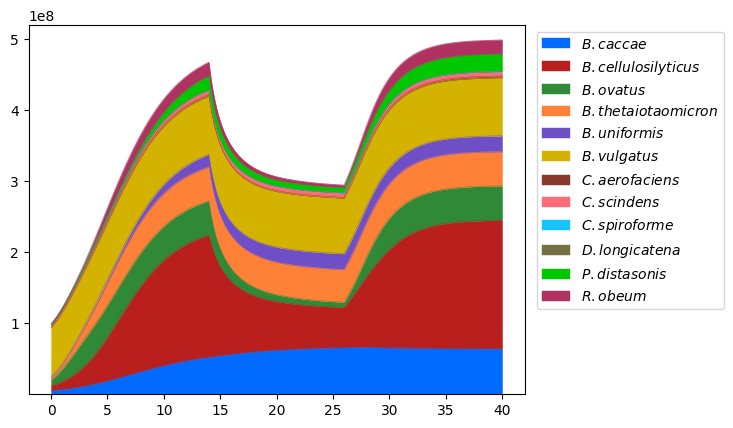

In [10]:
pera.plot.area(stacked=True, 
        color=cols, 
        rot=0, 
        linewidth=0.3,
        ylim=(1e5, 5.2e8))
# plt.yscale('log')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

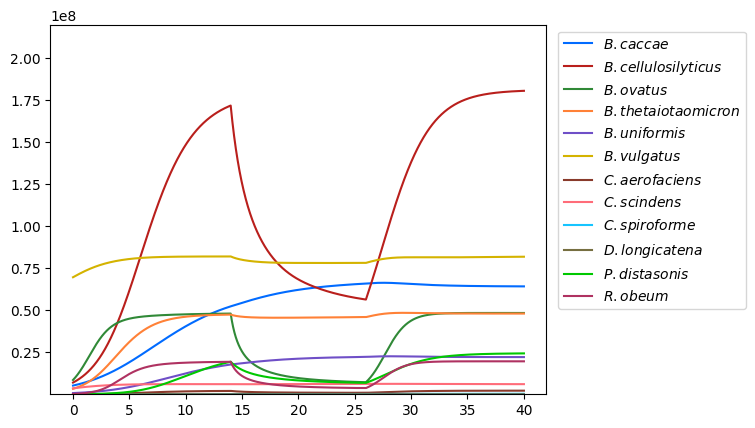

In [11]:
pera.plot.line(color=cols, 
        rot=0,
        ylim=(1e5, 2.2e8))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

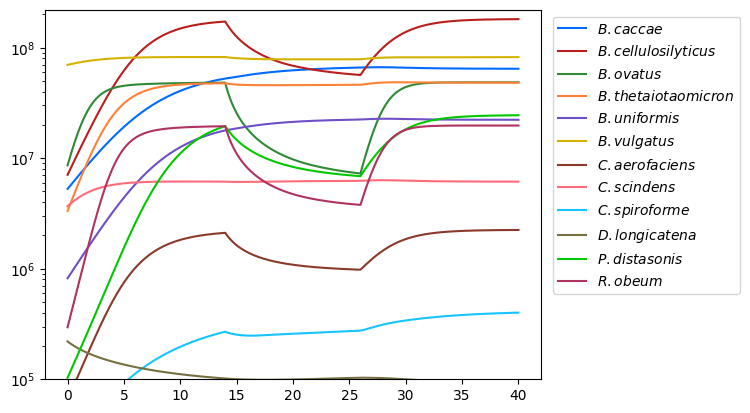

In [12]:
pera.plot.line(color=cols, 
        rot=0,
        ylim=(1e5, 2.2e8))
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()